#  <b><span style="color:#7689de"><center> Bank Loans dataset </span></b> </center>
### <span style="color:#5c374c"><center>   Regression and Classification </span></b> </center>


   

<span> <center><img src="https://img.etimg.com/thumb/msid-80352140,width-600,height-400,imgsize-117090,resizemode-8,quality-100/industry/banking/finance/banking/public-sector-banks-lead-in-loan-revival-as-private-banks-fear-defaulting.jpg" /></span>




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVR


from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

# Plot style
plt.style.use("seaborn-whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Lodding the dataset
df = pd.read_csv("Bank loans.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(381, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


# Univarite Visulaization:

Visulize each Features spearately to understand well the dataset

In [ ]:
df['Gender'].value_counts().sort_values(ascending=False)

Male      291
Female     85
Name: Gender, dtype: int64

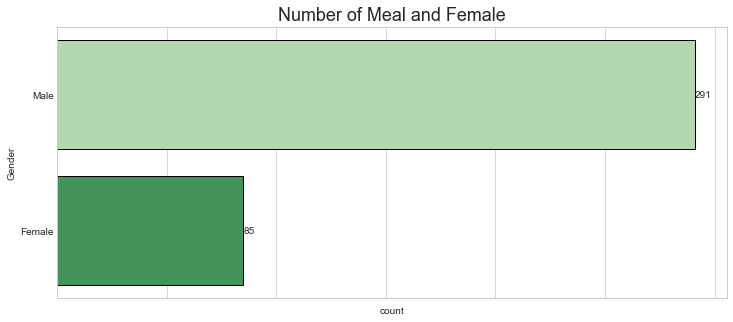

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax=sns.countplot(y='Gender', data=df, palette='Greens', order = df['Gender'].value_counts().index,
                edgecolor="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of Meal and Female',fontsize=18)
plt.show()


We note the Customers of Male more than Female

In [ ]:
df['Married'].value_counts().sort_values(ascending=False)

Yes    228
No     153
Name: Married, dtype: int64

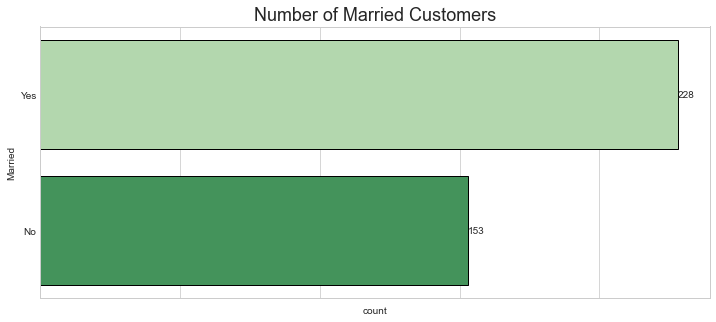

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax=sns.countplot(y='Married', data=df, palette='Greens', order = df['Married'].value_counts().index,
                edgecolor="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of Married Customers',fontsize=18)
plt.show()


We note the Customers married more than unmarried

In [ ]:
df['Dependents'].value_counts().sort_values(ascending=False)

0     234
2      59
1      52
3+     28
Name: Dependents, dtype: int64

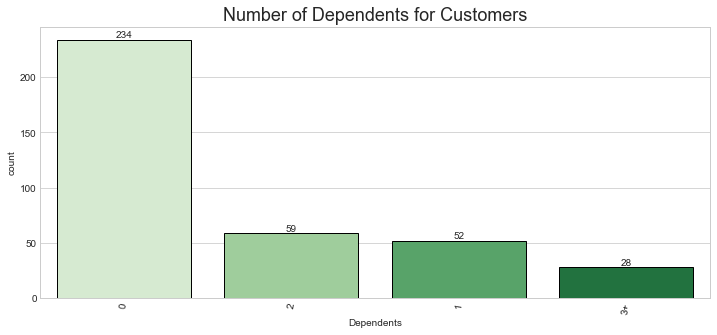

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax=sns.countplot(x='Dependents', data=df, palette='Greens', order = df['Dependents'].value_counts().index,
                edgecolor="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of Dependents for Customers',fontsize=18)
plt.show()


We note that Customers without dependents are taking out a Loan, and when the dependents increase, the number of Customers taking Loan decreases

In [ ]:
df['Education'].value_counts().sort_values(ascending=False)

Graduate        278
Not Graduate    103
Name: Education, dtype: int64

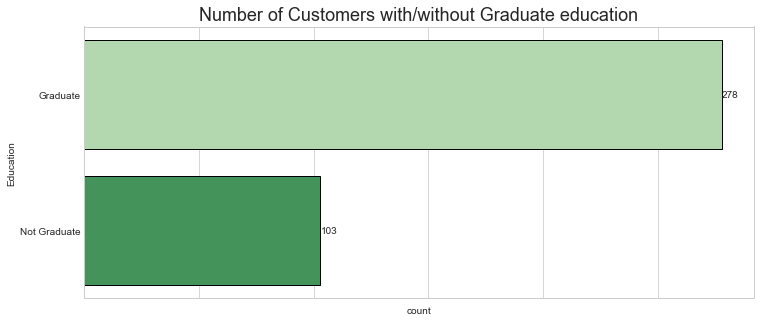

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax=sns.countplot(y='Education', data=df, palette='Greens', order = df['Education'].value_counts().index,
                edgecolor="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of Customers with/without Graduate education',fontsize=18)
plt.show()

We note that Customers who graduated take out Loan more than undergraduate

In [ ]:
df['Self_Employed'].value_counts().sort_values(ascending=False)

No     325
Yes     35
Name: Self_Employed, dtype: int64

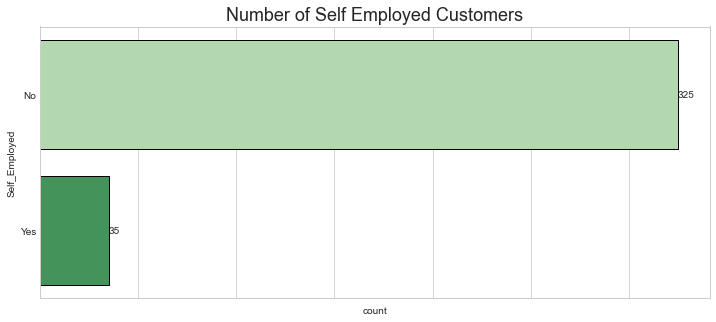

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax=sns.countplot(y='Self_Employed', data=df, palette='Greens', order = df['Self_Employed'].value_counts().index,
                edgecolor="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of Self Employed Customers',fontsize=18)
plt.show()

We note that Self Employed Customers take out Loan more than others

In [ ]:
df['ApplicantIncome'].value_counts().sort_values(ascending=False)

2500    8
2600    5
4583    4
2583    4
3750    4
       ..
1836    1
1880    1
2787    1
2297    1
4106    1
Name: ApplicantIncome, Length: 322, dtype: int64

In [ ]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,6),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='Mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='Median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='Mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

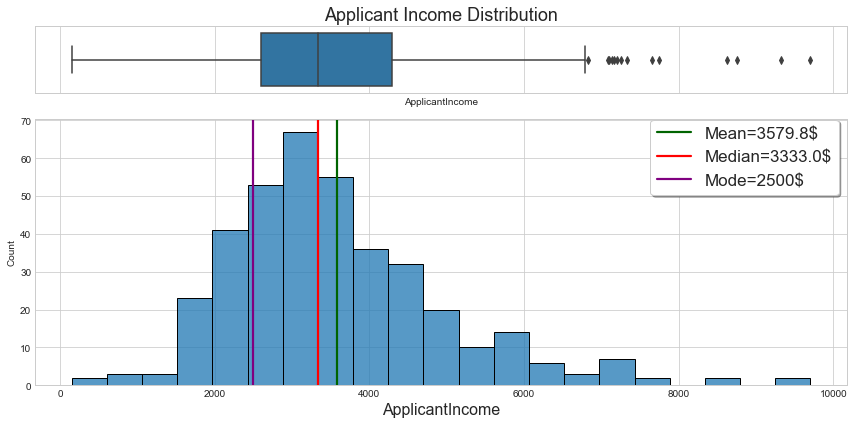

In [ ]:
num_plot(df, 'ApplicantIncome', 'Applicant Income Distribution','$')

In [ ]:
df['CoapplicantIncome'].value_counts().sort_values(ascending=False)

0.0       175
2500.0      4
1666.0      4
1459.0      3
1800.0      3
         ... 
1522.0      1
3416.0      1
3300.0      1
1302.0      1
1950.0      1
Name: CoapplicantIncome, Length: 182, dtype: int64

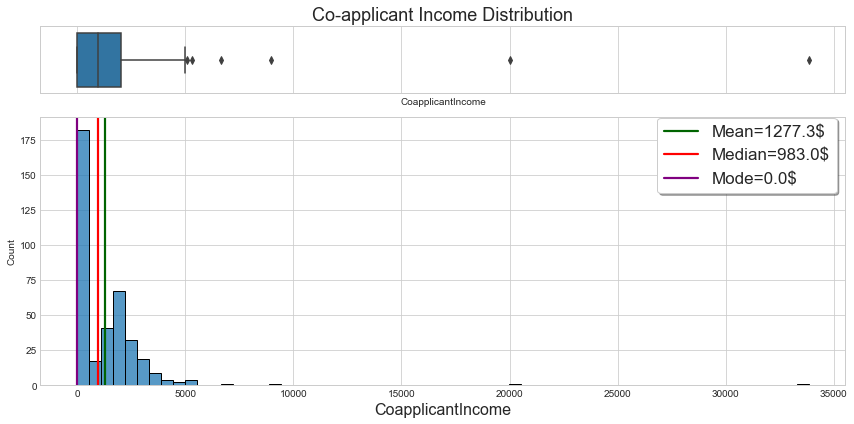

In [ ]:
num_plot(df, 'CoapplicantIncome', 'Co-applicant Income Distribution','$')

In [ ]:
df['LoanAmount'].value_counts().sort_values(ascending=False)

120.0    19
110.0    16
100.0    15
113.0    11
128.0    11
         ..
149.0     1
62.0      1
53.0      1
119.0     1
40.0      1
Name: LoanAmount, Length: 101, dtype: int64

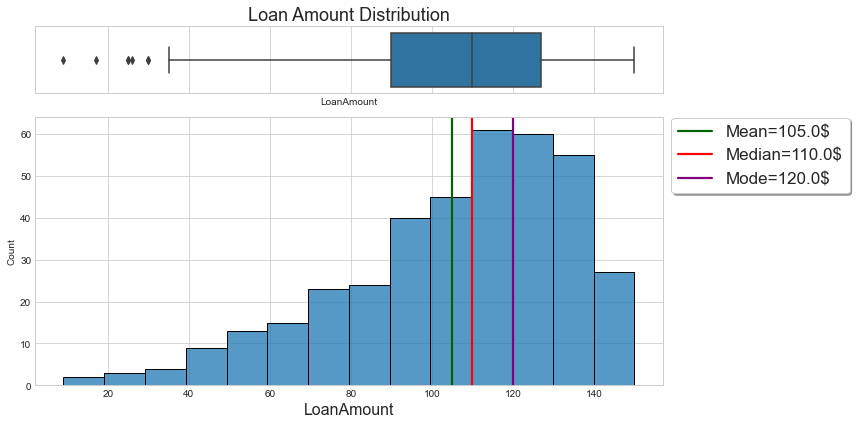

In [ ]:
num_plot(df, 'LoanAmount', 'Loan Amount Distribution','$')

In [ ]:
df['Loan_Amount_Term'].value_counts().sort_values(ascending=False)

360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

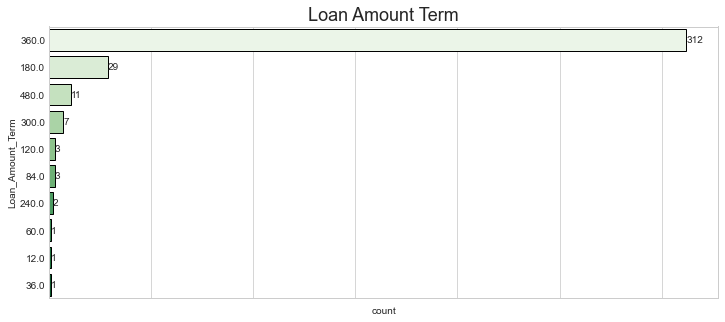

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax=sns.countplot(y='Loan_Amount_Term', data=df, palette='Greens', order = df['Loan_Amount_Term'].value_counts().index,
                edgecolor="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Loan Amount Term',fontsize=18)
plt.show()

In [ ]:
df['Credit_History'].value_counts().sort_values(ascending=False)

1.0    294
0.0     57
Name: Credit_History, dtype: int64

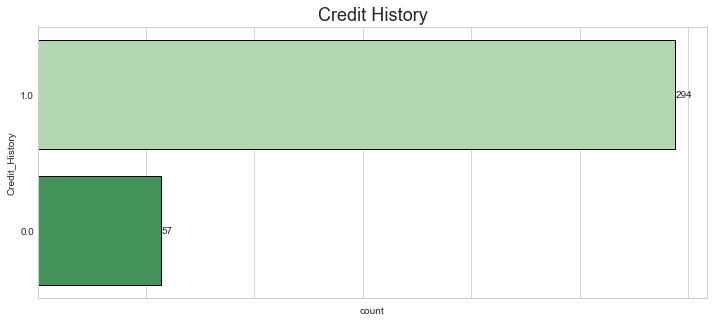

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax=sns.countplot(y='Credit_History', data=df, palette='Greens', order = df['Credit_History'].value_counts().index,
                edgecolor="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Credit History',fontsize=18)
plt.show()

In [ ]:
df['Property_Area'].value_counts().sort_values(ascending=False)

Semiurban    149
Urban        126
Rural        106
Name: Property_Area, dtype: int64

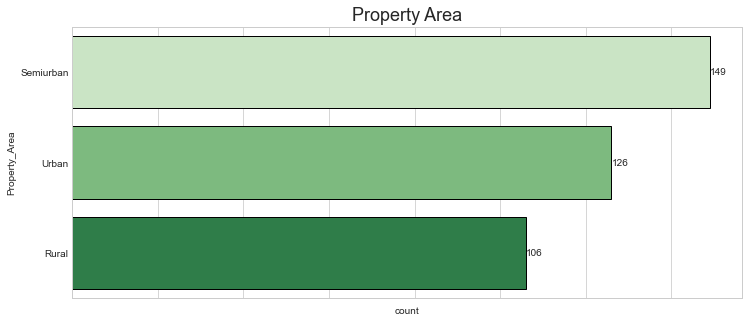

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax=sns.countplot(y='Property_Area', data=df, palette='Greens', order = df['Property_Area'].value_counts().index,
                edgecolor="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Property Area',fontsize=18)
plt.show()

In [ ]:
df['Loan_Status'].value_counts().sort_values(ascending=False)

Y    271
N    110
Name: Loan_Status, dtype: int64

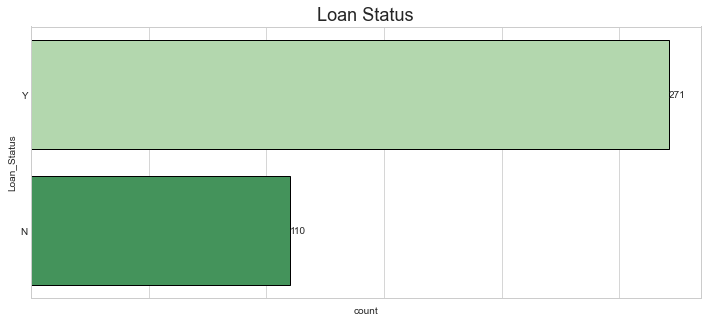

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax=sns.countplot(y='Loan_Status', data=df, palette='Greens', order = df['Loan_Status'].value_counts().index,
                edgecolor="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Loan Status',fontsize=18)
plt.show()

## Clean Data And Preprocessising For Modeling

In [ ]:
# drop the Loan_ID column since it does not effect the models result
df.drop(columns=['Loan_ID'], axis=1, inplace=True)

In [ ]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
# checking the missing values
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Filling the missing value in the gender column with the mode value
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [ ]:
# Fill the missing value in the dependents column by 0
df['Dependents'].fillna('0', inplace=True)

In [ ]:
# Filling the missing value in the "Self_Employed" column by the mode
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [ ]:
# Filling the missing value in the "Loan_Amount_Term" column by the median
df['Loan_Amount_Term'].fillna(df.Loan_Amount_Term.median(), inplace=True)

In [ ]:
# Filling the missing value in the "Credit_History" column by the mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [ ]:
# the total of the null value in the dataset now = 0
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [ ]:
# Handling the categorical variables
df.describe(exclude='number')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,381,381,381,381,381,381,381
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,296,228,242,278,346,149,271


In [ ]:
# Rename the "Education" column to be more informative
df.rename(columns={'Education':'Graduated'}, inplace=True)

In [ ]:
# Mapping the binary categorical features to 0 and 1

df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})

df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})

df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

df['Graduated'] = df['Graduated'].map({'Graduate': 1, 'Not Graduate':0})


In [ ]:
df.head()

,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
1,Male,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
2,Male,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
3,Male,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
4,Male,1,0,0,0,2333,1516.0,95.0,360.0,1.0,Urban,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    int64  
 2   Dependents         381 non-null    object 
 3   Graduated          381 non-null    int64  
 4   Self_Employed      381 non-null    int64  
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 35.8+ KB


 OneHot Encoding

In [ ]:
#OneHot Encoding
one_hot = OneHotEncoder()

col_names = ['Gender','Property_Area']

one_hot_df = one_hot.fit_transform(df[col_names]).toarray()

In [ ]:
one_hot.categories_[1]

array(['Rural', 'Semiurban', 'Urban'], dtype=object)

In [ ]:
column_names = []

for i in range(len(one_hot.categories_)):
    for j in range(len(one_hot.categories_[i])):
        column_names.append(col_names[i]+'_'+one_hot.categories_[i][j])

In [ ]:
column_names

['Gender_Female',
 'Gender_Male',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [ ]:
oh_df = pd.DataFrame(one_hot_df, index=df.index, columns=column_names)

In [ ]:
# append the one hot data frame to our original dataset
for col in oh_df.columns:
    df[col] = oh_df[col]
    
# drop the encoded columns    
df.drop(col_names, axis=1, inplace=True)

In [ ]:
# Encoding the "Dependents" using LabelEncoder
le = LabelEncoder()

df['Dependents'] = le.fit_transform(df['Dependents'])

In [ ]:
le.classes_

array(['0', '1', '2', '3+'], dtype=object)

# DATA VISUALIZATION

# Multivarite Features Vizualization:
Visualize the relationship between independent (X_Features) and dependent (Y_Target= LoanAmount).

In [ ]:
from scipy import stats

# The distibution between LoanAmount and Married

In [ ]:
df['Married'].value_counts()

1    228
0    153
Name: Married, dtype: int64

In [ ]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x=col_x, y = col_y, data=df,line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x,fontsize=18)
    plt.show()

    return slope, intercept

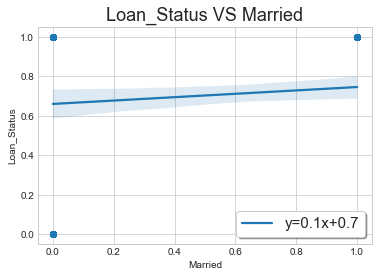

In [ ]:
slope, intercept = lr_plot(df,'Married','Loan_Status', 'lower right')

# The distibution between LoanAmount and Dependents

In [ ]:
df['Dependents'].value_counts()

0    242
2     59
1     52
3     28
Name: Dependents, dtype: int64

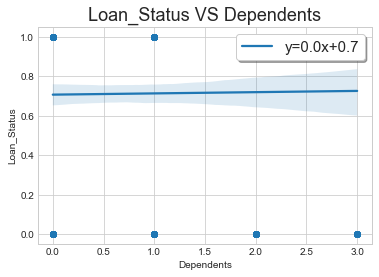

In [ ]:
slope, intercept = lr_plot(df,'Dependents','Loan_Status', 'upper right')

# The distibution between LoanAmount and Graduated

In [ ]:
df['Graduated'].value_counts()

1    278
0    103
Name: Graduated, dtype: int64

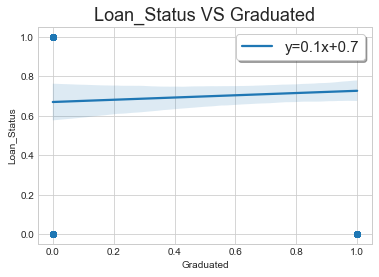

In [ ]:
slope, intercept = lr_plot(df,'Graduated','Loan_Status', 'upper right')

# The distibution between LoanAmount and Self Employed

In [ ]:
df['Self_Employed'].value_counts()

0    346
1     35
Name: Self_Employed, dtype: int64

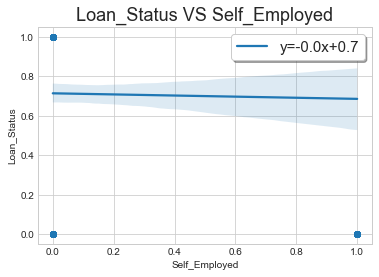

In [ ]:
slope, intercept = lr_plot(df,'Self_Employed','Loan_Status', 'upper right')

# The distibution between LoanAmount and Applicant Income

In [ ]:
df['ApplicantIncome'].value_counts()

2500    8
2600    5
4583    4
2583    4
3750    4
       ..
150     1
3850    1
3430    1
2479    1
4106    1
Name: ApplicantIncome, Length: 322, dtype: int64

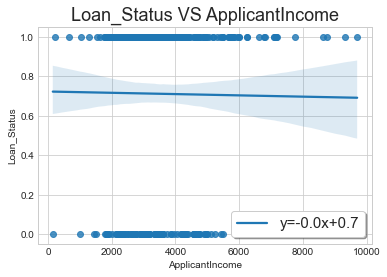

In [ ]:
slope, intercept = lr_plot(df,'ApplicantIncome','Loan_Status', 'lower right')

# The distibution between LoanAmount and Coapplicant Income

In [ ]:
df['CoapplicantIncome'].value_counts()

0.0       175
1666.0      4
2500.0      4
1459.0      3
1800.0      3
         ... 
1083.0      1
3021.0      1
983.0       1
1775.0      1
1950.0      1
Name: CoapplicantIncome, Length: 182, dtype: int64

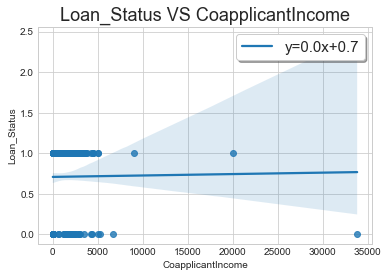

In [ ]:
slope, intercept = lr_plot(df,'CoapplicantIncome','Loan_Status', 'upper right')

# The distibution between LoanAmount and Loan Amount Term

In [ ]:
df['Loan_Amount_Term'].value_counts()

360.0    323
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

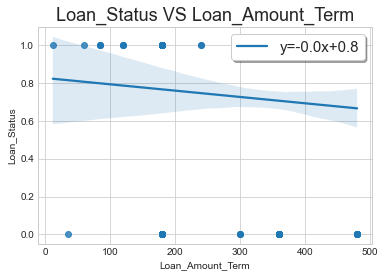

In [ ]:
slope, intercept = lr_plot(df,'Loan_Amount_Term','Loan_Status', 'upper right')

# The distibution between LoanAmount and Credit History

In [ ]:
df['Credit_History'].value_counts()

1.0    324
0.0     57
Name: Credit_History, dtype: int64

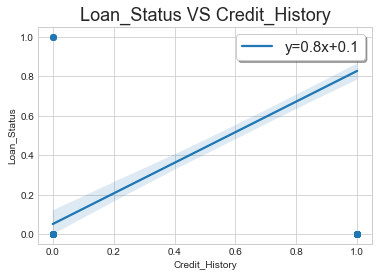

In [ ]:
slope, intercept = lr_plot(df,'Credit_History','Loan_Status', 'upper right')

# The distibution between LoanAmount and Loan Status

In [ ]:
df['Loan_Status'].value_counts()

1    271
0    110
Name: Loan_Status, dtype: int64

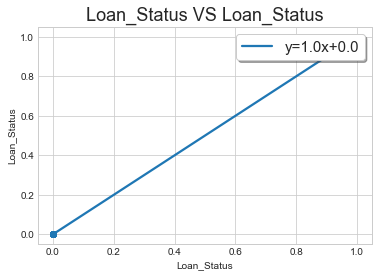

In [ ]:
slope, intercept = lr_plot(df,'Loan_Status','Loan_Status', 'upper right')

In [ ]:
import matplotlib.pyplot as plt         

In [ ]:
df.columns

Index(['Married', 'Dependents', 'Graduated', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

<AxesSubplot:>

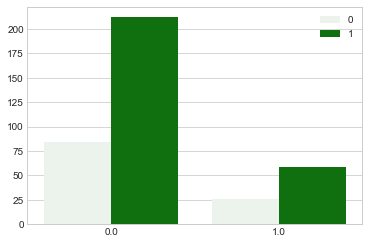

In [ ]:
a=df.groupby('Gender_Female')['Loan_Status'].value_counts()
sns.barplot(x = a.index.map(lambda x:x[0]), y = a.values, hue = a.index.map(lambda x:x[1]),color="g")

<Figure size 432x288 with 0 Axes>

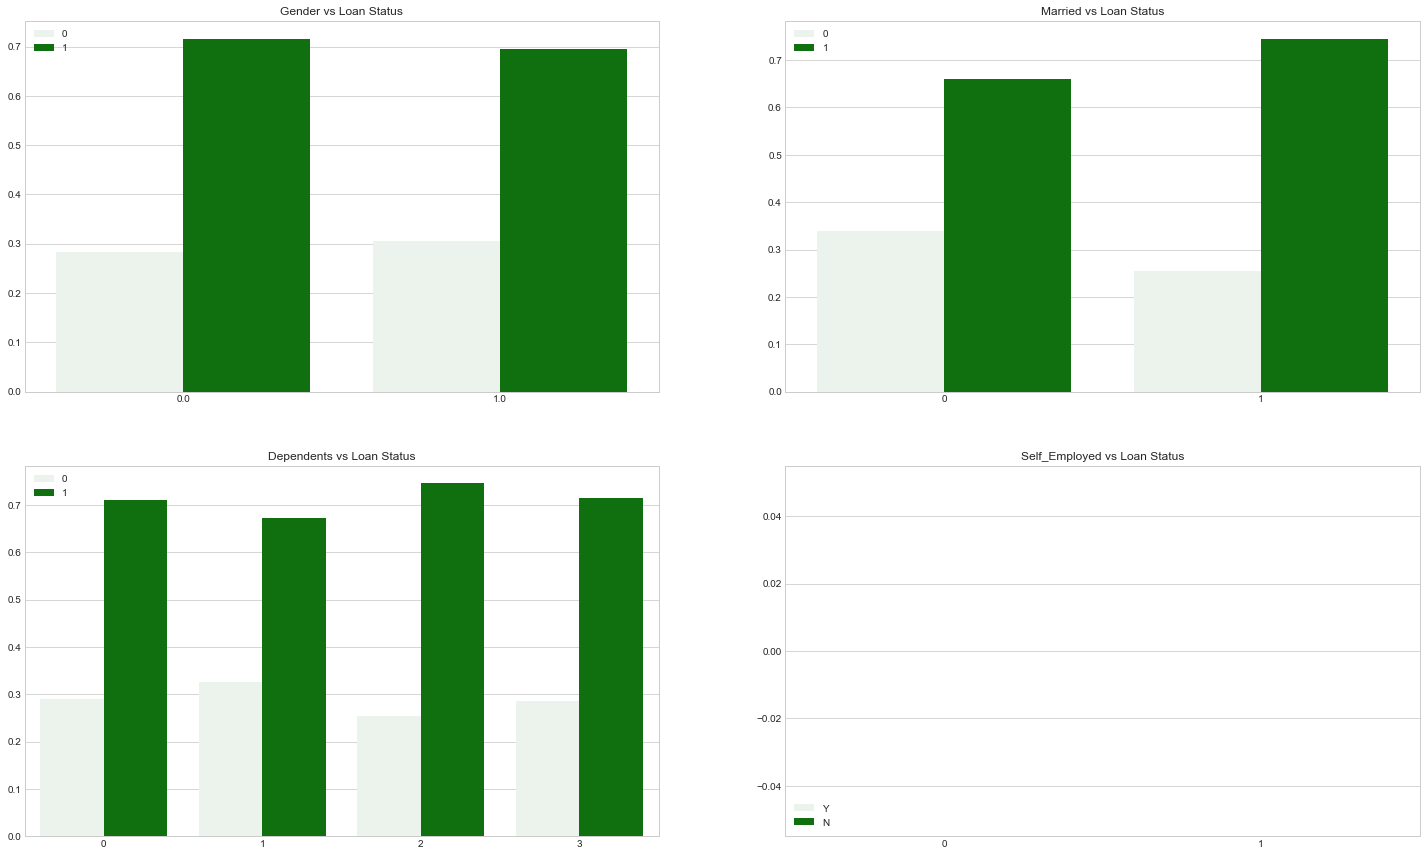

In [ ]:
plt.figure(1)
plt.figure(figsize=(25,15))

plt.subplot(221)
a = df.groupby('Gender_Female')['Loan_Status'].value_counts(normalize=True)
sns.barplot(x = a.index.map(lambda x:x[0]), y = a.values, hue = a.index.map(lambda x:x[1]),color="g")
plt.title('Gender vs Loan Status')

plt.subplot(2,2,2)
b = df.groupby('Married')['Loan_Status'].value_counts(normalize=True)
sns.barplot(x = b.index.map(lambda x:x[0]), y = b.values, hue = b.index.map(lambda x:x[1]),color="g")
plt.title('Married vs Loan Status')

plt.subplot(2,2,3)
c = df.groupby('Dependents')['Loan_Status'].value_counts(normalize=True)
sns.barplot(x = c.index.map(lambda x:x[0]), y = c.values, hue = c.index.map(lambda x:x[1]),color="g")
plt.title('Dependents vs Loan Status')

plt.subplot(2,2,4)
d = df.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True)
sns.barplot(x = d.index.map(lambda x:x[0]), y = d.values, hue = d.index.map(lambda x:x[1]),hue_order=['Y','N'],color="g")
plt.title('Self_Employed vs Loan Status')

plt.show()

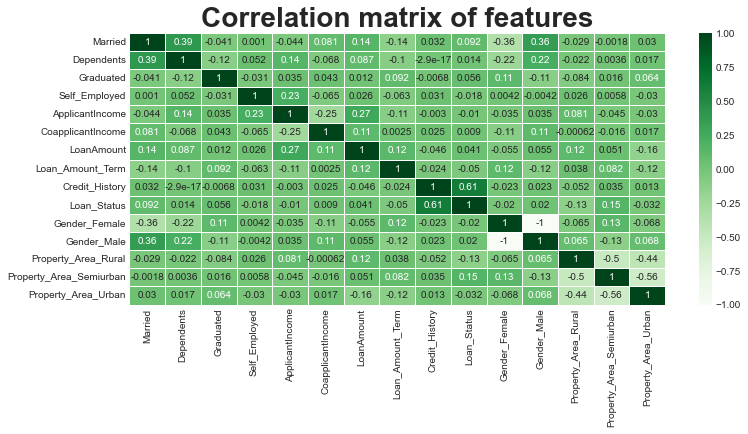

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12,5)) 
sns.heatmap(corr,annot=True, cmap = "Greens", linewidth = 0.50)
plt.title("Correlation matrix of features",fontweight="bold",fontsize=28)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  381 non-null    int64  
 1   Dependents               381 non-null    int32  
 2   Graduated                381 non-null    int64  
 3   Self_Employed            381 non-null    int64  
 4   ApplicantIncome          381 non-null    int64  
 5   CoapplicantIncome        381 non-null    float64
 6   LoanAmount               381 non-null    float64
 7   Loan_Amount_Term         381 non-null    float64
 8   Credit_History           381 non-null    float64
 9   Loan_Status              381 non-null    int64  
 10  Gender_Female            381 non-null    float64
 11  Gender_Male              381 non-null    float64
 12  Property_Area_Rural      381 non-null    float64
 13  Property_Area_Semiurban  381 non-null    float64
 14  Property_Area_Urban      3

In [ ]:
df.head()

,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0.0,1.0,1.0,0.0,0.0
1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0.0,1.0,0.0,0.0,1.0
2,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0.0,1.0,0.0,0.0,1.0
3,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0.0,1.0,0.0,0.0,1.0
4,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Identify our target for classification models
target = "Loan_Status"

x = df.drop(target, axis=1)
y = df[target]

In [ ]:
# Identify our target for regression models
target1 = "LoanAmount"

x1 = df.drop(target1, axis=1)
y1 = df[target1]

In [ ]:
# Spliting our data into train and test sets for calsssification models
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=0
)

In [ ]:
# Spliting our data into train and test sets for regression models
x_train1, x_test1, y_train1, y_test1 = train_test_split(
    x1,
    y1,
    test_size=0.2,
    random_state=0
)

In [ ]:
x_train1

,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
190,1,0,0,0,2875,1750.0,360.0,1.0,1,0.0,1.0,0.0,1.0,0.0
305,1,3,0,0,3095,0.0,360.0,1.0,1,0.0,1.0,1.0,0.0,0.0
237,0,0,1,0,3069,0.0,480.0,1.0,0,0.0,1.0,0.0,0.0,1.0
331,1,3,1,1,5677,1424.0,360.0,1.0,1,0.0,1.0,1.0,0.0,0.0
135,1,2,1,0,4283,2383.0,360.0,1.0,1,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1,2,1,0,3283,2035.0,360.0,1.0,1,0.0,1.0,0.0,0.0,1.0
192,1,1,1,0,1625,1803.0,360.0,1.0,1,0.0,1.0,0.0,0.0,1.0
117,0,0,1,0,4191,0.0,360.0,1.0,1,0.0,1.0,1.0,0.0,0.0
47,0,0,1,0,4166,0.0,360.0,0.0,0,1.0,0.0,0.0,1.0,0.0


In [ ]:

def reg_cost(method, actual, preds):
    mae = mean_absolute_error(y_true=actual, y_pred=preds)
    mse = mean_squared_error(y_true=actual, y_pred=preds)
    
    print(f'Cost functions for the {method} regression is:')
    print(f'Mean Square Error: {round(mse,2)}')
    print(f'Mean Absolute Error: {round(mae,2)}\n\n')

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train1_sc = scaler.fit_transform(x_train1)
X_test1_sc = scaler.transform(x_test1)

# Scale Data

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train1_sc = scaler.fit_transform(x_train1)

X_test1_sc = scaler.transform(x_test1)

### Function for evaluating regression models

### Ordinary Least Squares Regression with Statsmodels

In [ ]:
# Create your model
model = sm.OLS(y_train1, X_train1_sc)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             LoanAmount   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):             -0.028
Method:                 Least Squares   F-statistic:                             0.3094
Date:                Sun, 30 Oct 2022   Prob (F-statistic):                       0.987
Time:                        07:58:35   Log-Likelihood:                         -1855.9
No. Observations:                 304   AIC:                                      3736.
Df Residuals:                     292   BIC:                                      3780.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.8179      7.483      0.644      0.520      -9.909      19.545
x2             1.3138      7.154      0.184      0.854     -12.766      15.394
x3            -0.2922      6.512     -0.045      0.964     -13.109      12.525
x4            -1.3909      6.623     -0.210      0.834     -14.426      11.644
x5             9.8203      6.954      1.412      0.159      -3.865      23.506
x6             5.1036      6.697      0.762      0.447      -8.077      18.284
x7             3.8099      6.640      0.574      0.567      -9.258      16.877
x8            -4.9674      8.216     -0.605      0.546     -21.138      11.203
x9             3.8687      8.377      0.462      0.645     -12.618      20.355
x10            0.6323      3.590      0.176      0.860      -6.433       7.698
x11           -0.6323      3.590     -0.176      0.860      -7.698       6.433
x12            1.4065      4.523      0.311      0.756      -7.495      10.308
x13            1.2831      4.246      0.302      0.763      -7.074       9.640
x14           -2.6099      4.230     -0.617      0.538     -10.936       5.716
==============================================================================
Omnibus:                       29.561   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.548
Skew:                          -0.766   Prob(JB):                     1.91e-08
Kurtosis:                       3.676   Cond. No.                     1.37e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.13e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## First Regression Model

### Random Forest For Regression



In [ ]:
reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 0, criterion = 'mse')

reg_forest.fit(X_train1_sc, y_train1)

preds_forest = reg_forest.predict(X_test1_sc)

print(reg_forest.score(X_train1_sc,y_train1))
print(reg_forest.score(X_test1_sc,y_test1))

0.8428356395005179
0.29468958129676515


In [ ]:
# Result Test 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, preds_forest))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, preds_forest))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, preds_forest)))

Mean Absolute Error: 18.801298701298702
Mean Squared Error: 572.9214285714286
Root Mean Squared Error: 23.935777166648016


In [ ]:
reg_forest.feature_importances_

array([0.03260818, 0.04826471, 0.02593176, 0.02055201, 0.45327381,
       0.23248261, 0.05735817, 0.01702735, 0.02026111, 0.01278349,
       0.0103727 , 0.01481929, 0.02050759, 0.03375721])

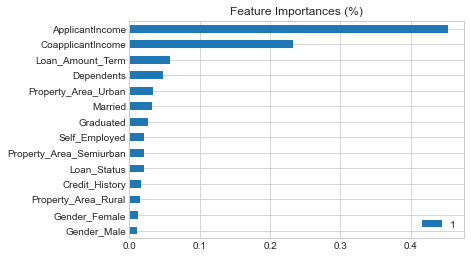

In [ ]:
# Plot Feature Importances to Visualize better

pd.DataFrame(dict(zip(x_train1.columns, reg_forest.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");

In [ ]:
# Grid Search for Regression

param_grid2 = {
    "n_estimators": [5,7,10, 15], # how many trees in our forest
    "max_depth": [2,4,6] # how deep each decision tree can be
    
}

grid2 = GridSearchCV(
    reg_forest,
    param_grid2,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

grid2.fit(X_train1_sc, y_train1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='mse', n_estimators=10,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'n_estimators': [5, 7, 10, 15]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
grid_df = pd.DataFrame(grid2.cv_results_)

grid_df 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018590,0.001020,0.002399,4.896291e-04,2,5,"{'max_depth': 2, 'n_estimators': 5}",-21.006970,-21.303906,-18.114386,-20.564018,-22.125591,-20.622974,1.353918,10
1,0.022187,0.003058,0.002399,4.897654e-04,2,7,"{'max_depth': 2, 'n_estimators': 7}",-20.283675,-21.283820,-17.481064,-19.970871,-22.252956,-20.254477,1.601660,8
2,0.026185,0.002039,0.002599,4.898822e-04,2,10,"{'max_depth': 2, 'n_estimators': 10}",-20.403729,-21.217791,-17.200769,-19.669532,-21.270256,-19.952415,1.496205,3
3,0.043574,0.006648,0.003998,8.941494e-04,2,15,"{'max_depth': 2, 'n_estimators': 15}",-20.594014,-21.334988,-17.121896,-19.943178,-21.541728,-20.107161,1.596325,6
4,0.014591,0.000800,0.001999,6.324097e-04,4,5,"{'max_depth': 4, 'n_estimators': 5}",-21.031526,-21.829939,-16.453348,-20.030950,-22.564911,-20.382135,2.137337,9
5,0.029783,0.018638,0.002199,4.002580e-04,4,7,"{'max_depth': 4, 'n_estimators': 7}",-21.124659,-21.825708,-15.571151,-19.806513,-22.085070,-20.082620,2.390129,5
6,0.029183,0.002992,0.002799,4.001858e-04,4,10,"{'max_depth': 4, 'n_estimators': 10}",-20.665236,-21.628715,-15.720752,-19.519284,-21.498038,-19.806405,2.176925,2
7,0.044574,0.004361,0.002998,7.629395e-07,4,15,"{'max_depth': 4, 'n_estimators': 15}",-20.411159,-21.421725,-16.360924,-19.337831,-21.170571,-19.740442,1.838754,1
8,0.019188,0.002855,0.002199,3.998759e-04,6,5,"{'max_depth': 6, 'n_estimators': 5}",-23.364871,-21.099083,-17.266842,-20.119210,-22.612149,-20.892431,2.138030,12
9,0.021387,0.001743,0.002399,4.896678e-04,6,7,"{'max_depth': 6, 'n_estimators': 7}",-23.391729,-21.167938,-16.160464,-20.526791,-22.262288,-20.701842,2.471537,11


In [ ]:
parameters = ['param_max_depth','param_n_estimators','mean_test_score','rank_test_score']

grid_df[parameters]

,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
0,2,5,-20.622974,10
1,2,7,-20.254477,8
2,2,10,-19.952415,3
3,2,15,-20.107161,6
4,4,5,-20.382135,9
5,4,7,-20.082620,5
6,4,10,-19.806405,2
7,4,15,-19.740442,1
8,6,5,-20.892431,12
9,6,7,-20.701842,11


In [ ]:
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
7,4,15,-19.740442,1
6,4,10,-19.806405,2
2,2,10,-19.952415,3
11,6,15,-20.077709,4
5,4,7,-20.082620,5
3,2,15,-20.107161,6
10,6,10,-20.166679,7
1,2,7,-20.254477,8
4,4,5,-20.382135,9
0,2,5,-20.622974,10


In [ ]:
grid2.best_score_

-19.740441863519344

In [ ]:
grid2.best_params_

{'max_depth': 4, 'n_estimators': 15}

In [ ]:
grid2.best_estimator_.estimators_

[DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=209652396),
 DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=398764591),
 DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=924231285),
 DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=1478610112),
 DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=441365315),
 DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=1537364731),
 DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=192771779),
 DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=1491434855),
 DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=1819583497),
 DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=530702035),
 DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=626610453),
 DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=1650906866),
 DecisionTr

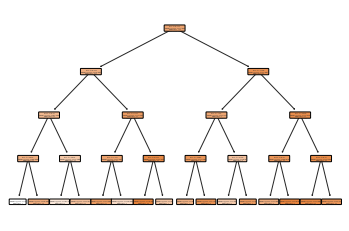

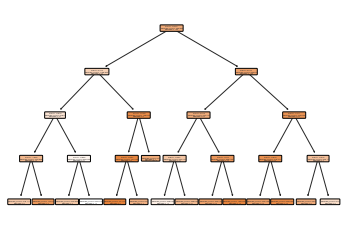

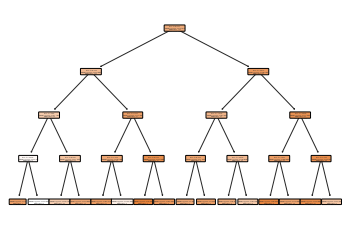

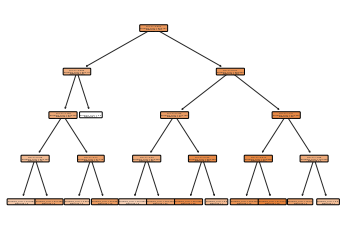

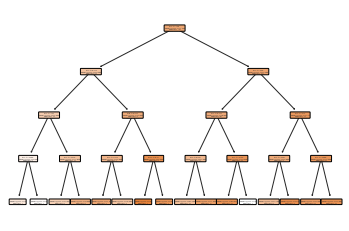

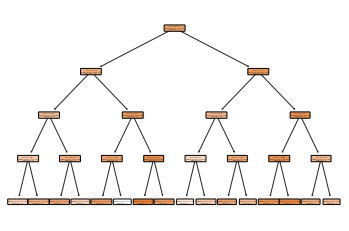

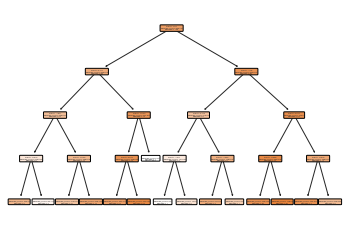

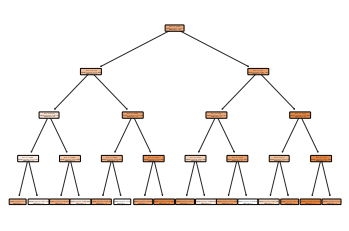

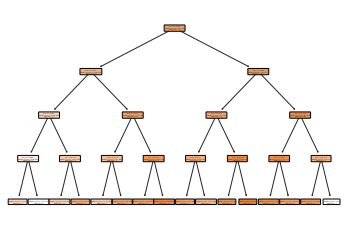

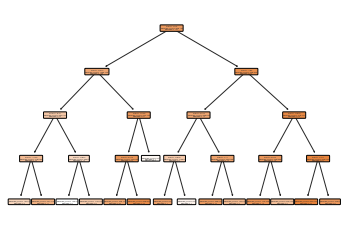

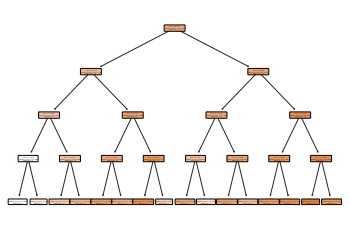

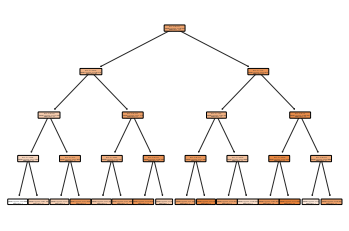

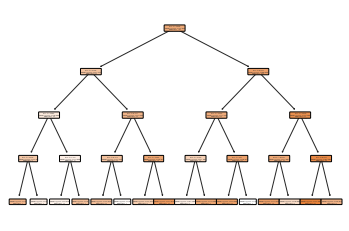

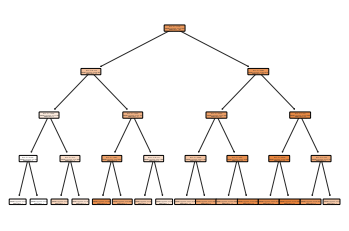

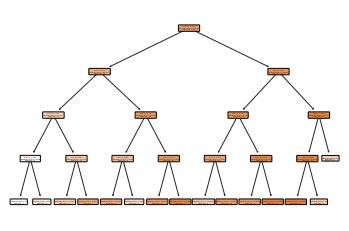

In [ ]:
# Plot the Decision Trees from the Grid Search Random Forest

for x in range(len(grid2.best_estimator_.estimators_)):
    tree.plot_tree(
    grid2.best_estimator_.estimators_[x], # Access each individual estimator
    filled=True,
    rounded=True,
    )
    plt.show()

In [ ]:
grid2.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=4, n_estimators=15,
                      random_state=0)

In [ ]:
reg_forest = RandomForestRegressor(n_estimators = 15, random_state = 0,max_depth=4, criterion = 'mse')

reg_forest.fit(X_train1_sc, y_train1)

preds_forest = reg_forest.predict(X_test1_sc)

print(reg_forest.score(X_train1_sc,y_train1))
print(reg_forest.score(X_test1_sc,y_test1))

mean_absolute_error(y_true=y_test1, y_pred=preds_forest)

0.5267734407894353
0.3880598690518897


17.378305933576808

## Second Regression Model

### K-Nearest Neighbors regression

In [ ]:
knn= KNeighborsRegressor(n_neighbors=int(i))
knn.fit(x_train1,y_train1)

knn_pred= knn.predict(x_test1)

print(knn.score(x_train1,y_train1))
print(knn.score(x_test1,y_test1))

1.0
-0.19881323259362116


In [ ]:
# Result Test 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, knn_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, knn_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, knn_pred)))

Mean Absolute Error: 23.246753246753247
Mean Squared Error: 973.7922077922078
Root Mean Squared Error: 31.205643845179797


## Third Regression Model

### Linear Regression 

In [ ]:
lr = LinearRegression()
lr.fit(x_train1, y_train1)

lr_preds = lr.predict(x_test1)

print(lr.score(x_train1,y_train1))
print(lr.score(x_test1,y_test1))

0.187142002566693
0.15877191659286527


In [ ]:
pipe = make_pipeline(
    # Step-1 Scale parameters
    StandardScaler(),
    # Step-2 create PCA and set number of components
    PCA(n_components= 12),
    # Step-3 fit the principles to the ML model
    LinearRegression()
)

pipe.fit(x_train1, y_train1)
pipe.score(x_test1, y_test1)

0.1587719165928544

In [ ]:
# Result Test 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, lr_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, lr_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, lr_preds)))

Mean Absolute Error: 20.83207398840515
Mean Squared Error: 683.3269189276049
Root Mean Squared Error: 26.140522545037328


## Fourth Regression Model

### Regression using XGBoost

In [ ]:
# Fitting XGB regressor model and default base learner is Decision Tree
xgb_reg = xgb.XGBRegressor(objective = "reg:linear",
                           n_estimators = 75,
                           subsample = 0.75,
                           max_depth = 7)


In [ ]:
xgb_reg.fit(X_train1_sc, y_train1)
xgb_reg.score(X_test1_sc, y_test1)

[07:59:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


0.27200469380571834

In [ ]:
# Making Predictions
predictions = xgb_reg.predict(X_test1_sc)
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test1, predictions))))

RMSE: 24.317654


#### Hyperparameter tuning for XGBoost 


In [ ]:
# Grid Search Parameters
grid_search_params = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'n_estimators': [100],
    'subsample': [0.2, 0.5, 0.8],
    'max_depth': [2, 3, 5]
}

In [ ]:
xg_grid_reg = xgb.XGBRegressor(objective= "reg:squarederror")


In [ ]:
grid = GridSearchCV( estimator = xg_grid_reg,
                    param_grid = grid_search_params,
                    scoring = 'neg_mean_squared_error',
                    cv = 5, verbose = 1)

In [ ]:
grid.fit(X_train1_sc, y_train1)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [ ]:
grid_df = pd.DataFrame(grid.cv_results_)

grid_df 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.103141,0.001166,0.005597,4.893178e-04,0.3,0.01,2,100,0.2,"{'colsample_bytree': 0.3, 'learning_rate': 0.0...",-2068.870087,-2327.056909,-2313.922039,-2056.435949,-2896.908635,-2332.638724,304.842212,68
1,0.103741,0.002637,0.005996,7.599534e-07,0.3,0.01,2,100,0.5,"{'colsample_bytree': 0.3, 'learning_rate': 0.0...",-2006.848075,-2305.591406,-2241.662857,-1997.477696,-2819.507093,-2274.217425,299.150863,62
2,0.107139,0.000979,0.005996,9.536743e-08,0.3,0.01,2,100,0.8,"{'colsample_bytree': 0.3, 'learning_rate': 0.0...",-2002.864702,-2308.149769,-2240.715436,-1984.270699,-2793.708601,-2265.941841,293.088330,61
3,0.105140,0.000748,0.005997,1.507891e-07,0.3,0.01,3,100,0.2,"{'colsample_bytree': 0.3, 'learning_rate': 0.0...",-2082.603506,-2333.199851,-2321.434166,-2072.601650,-2894.066746,-2340.781184,298.373146,70
4,0.107539,0.000800,0.005997,4.623108e-07,0.3,0.01,3,100,0.5,"{'colsample_bytree': 0.3, 'learning_rate': 0.0...",-2015.608271,-2310.337171,-2243.656210,-1997.631575,-2811.384859,-2275.723617,294.670854,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.121131,0.000748,0.005997,6.322590e-04,0.7,0.5,3,100,0.5,"{'colsample_bytree': 0.7, 'learning_rate': 0.5...",-715.728053,-1135.865930,-598.163045,-837.711309,-1062.109175,-869.915503,203.139516,43
68,0.121331,0.000490,0.005996,6.322590e-04,0.7,0.5,3,100,0.8,"{'colsample_bytree': 0.7, 'learning_rate': 0.5...",-876.382218,-762.671243,-576.701362,-951.850180,-991.046269,-831.730254,149.407543,41
69,0.138921,0.000632,0.005997,3.873843e-07,0.7,0.5,5,100,0.2,"{'colsample_bytree': 0.7, 'learning_rate': 0.5...",-1743.172459,-2064.973662,-1870.553313,-1750.852029,-2141.562086,-1914.222710,162.643307,54
70,0.152513,0.001019,0.006197,3.997327e-04,0.7,0.5,5,100,0.5,"{'colsample_bytree': 0.7, 'learning_rate': 0.5...",-1134.099217,-987.594931,-718.375952,-1119.199344,-1171.835806,-1026.221050,165.980059,48


In [ ]:
parameters = ['param_colsample_bytree', 'param_learning_rate','param_max_depth','param_n_estimators','param_subsample', 'mean_test_score', 'rank_test_score']

grid_df[parameters]

,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,mean_test_score,rank_test_score
0,0.3,0.01,2,100,0.2,-2332.638724,68
1,0.3,0.01,2,100,0.5,-2274.217425,62
2,0.3,0.01,2,100,0.8,-2265.941841,61
3,0.3,0.01,3,100,0.2,-2340.781184,70
4,0.3,0.01,3,100,0.5,-2275.723617,65
...,...,...,...,...,...,...,...
67,0.7,0.5,3,100,0.5,-869.915503,43
68,0.7,0.5,3,100,0.8,-831.730254,41
69,0.7,0.5,5,100,0.2,-1914.222710,54
70,0.7,0.5,5,100,0.5,-1026.221050,48


In [ ]:
grid_df[parameters].sort_values('rank_test_score')

,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,mean_test_score,rank_test_score
46,0.7,0.1,2,100,0.5,-608.381743,1
47,0.7,0.1,2,100,0.8,-608.697653,2
45,0.7,0.1,2,100,0.2,-614.190602,3
11,0.3,0.1,2,100,0.8,-618.259529,4
50,0.7,0.1,3,100,0.8,-628.168614,5
...,...,...,...,...,...,...,...
0,0.3,0.01,2,100,0.2,-2332.638724,68
39,0.7,0.01,3,100,0.2,-2340.645016,69
3,0.3,0.01,3,100,0.2,-2340.781184,70
6,0.3,0.01,5,100,0.2,-2343.863294,71


In [ ]:
grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 100,
 'subsample': 0.5}

In [ ]:
xgb_reg = xgb.XGBRegressor(objective = "reg:linear",
                           colsample_bytree= 0.7,
                           learning_rate= 0.1,
                           n_estimators = 100,
                           subsample = 0.8,
                           max_depth = 2)


In [ ]:
xgb_reg.fit(X_train1_sc, y_train1)
print(xgb_reg.score(X_train1_sc, y_train1))
print(xgb_reg.score(X_test1_sc, y_test1))

[08:00:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
0.5752980588597176
0.28646836643930407


In [ ]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Predicting the results based on the best estimator 

pred1 = grid.best_estimator_.predict(x_test1)


In [ ]:
# Result Test 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, pred1)))

Mean Absolute Error: 26.757171432693283
Mean Squared Error: 1130.8444011227043
Root Mean Squared Error: 33.62802999170044


## Fifth Regression Model

### Decision Trees For Regression

In [ ]:
reg_tree = DecisionTreeRegressor(random_state = 0, max_depth= 4, criterion= 'mse')

reg_tree.fit(x_train1, y_train)

preds_tree = reg_tree.predict(x_test1)
print(xgb_reg.score(x_train1, y_train1))
print(xgb_reg.score(x_test1, y_test1))

mean_absolute_error(y_true=y_test, y_pred=preds_tree)

-0.2164045898190614
-0.29913664275565255


0.0

# First Classification Model

In [ ]:
# Instantiate Standard Scaler for 
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(x_train)
X_test_sc = scaler.transform(x_test)

### Support Vector For Classification


In [ ]:
class_sv = SVC(kernel = 'linear', random_state = 0)

class_sv.fit(X_train_sc, y_train)
preds_class = class_sv.predict(X_test_sc)

In [ ]:
val_train = round(class_sv.score(X_train_sc, y_train),2)*100
val_test = round(class_sv.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 85.0%
Test Set Accuracy: 82.0%


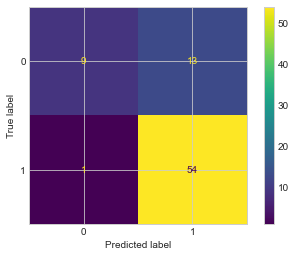

In [ ]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_sv, X_test_sc, y_test);

# Second Classification Model

### Random Forest For Classification

In [ ]:

class_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)


In [ ]:
class_forest.fit(X_train_sc, y_train)

preds_class = class_forest.predict(X_test_sc)

In [ ]:
val_train = round(class_forest.score(X_train_sc, y_train),2)*100
val_test = round(class_forest.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 99.0%
Test Set Accuracy: 79.0%


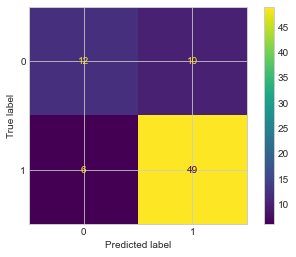

In [ ]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_forest, X_test_sc, y_test);

In [ ]:
# Tune hyperparameter Classification

param_grid = {
    "n_estimators": [10,20,30], # how many trees in our forest
    "criterion": ["gini", "entropy"], # what criteria is used to split nodes
    "max_depth": [2,4,6] # how deep each decision tree can be
    
}

grid = GridSearchCV(
    class_forest,
    param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_sc, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'n_estimators': [10, 20, 30]},
             verbose=1)

In [ ]:
grid_df = pd.DataFrame(grid.cv_results_)

grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025185,0.001166,0.002998,6.318820e-04,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.852459,0.836066,0.836066,0.852459,0.816667,0.838743,0.013251,15
1,0.055768,0.007752,0.006198,2.401781e-03,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.852459,0.836066,0.836066,0.836066,0.816667,0.835464,0.011342,17
2,0.084151,0.005632,0.006397,4.894149e-04,gini,2,30,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.852459,0.836066,0.819672,0.836066,0.883333,0.845519,0.021563,7
3,0.027983,0.002755,0.002599,4.894342e-04,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.852459,0.836066,0.836066,0.819672,0.866667,0.842186,0.016041,12
4,0.053169,0.003654,0.004797,3.996372e-04,gini,4,20,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.852459,0.836066,0.836066,0.852459,0.883333,0.852077,0.017263,1
5,0.080754,0.013430,0.006996,1.095018e-03,gini,4,30,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.852459,0.836066,0.836066,0.852459,0.883333,0.852077,0.017263,1
6,0.027584,0.004714,0.002998,3.873843e-07,gini,6,10,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.852459,0.786885,0.819672,0.836066,0.883333,0.835683,0.032217,16
7,0.050371,0.002331,0.004797,4.000425e-04,gini,6,20,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.852459,0.819672,0.836066,0.852459,0.866667,0.845464,0.016130,9
8,0.101742,0.015437,0.006597,4.896483e-04,gini,6,30,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.852459,0.819672,0.836066,0.852459,0.883333,0.848798,0.021118,5
9,0.030383,0.008376,0.003199,4.008533e-04,entropy,2,10,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",0.852459,0.836066,0.819672,0.852459,0.883333,0.848798,0.021118,5


In [ ]:
parameters = ['param_criterion','param_max_depth','param_n_estimators','mean_test_score','rank_test_score']

grid_df[parameters]

,param_criterion,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
0,gini,2,10,0.838743,15
1,gini,2,20,0.835464,17
2,gini,2,30,0.845519,7
3,gini,4,10,0.842186,12
4,gini,4,20,0.852077,1
5,gini,4,30,0.852077,1
6,gini,6,10,0.835683,16
7,gini,6,20,0.845464,9
8,gini,6,30,0.848798,5
9,entropy,2,10,0.848798,5


In [ ]:
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_criterion,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
17,entropy,6,30,0.852077,1
14,entropy,4,30,0.852077,1
5,gini,4,30,0.852077,1
4,gini,4,20,0.852077,1
9,entropy,2,10,0.848798,5
8,gini,6,30,0.848798,5
2,gini,2,30,0.845519,7
12,entropy,4,10,0.845519,8
7,gini,6,20,0.845464,9
13,entropy,4,20,0.845410,10


In [ ]:
grid.best_score_

0.8520765027322404

In [ ]:
grid.score(X_test_sc, y_test)

0.8181818181818182

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 20}

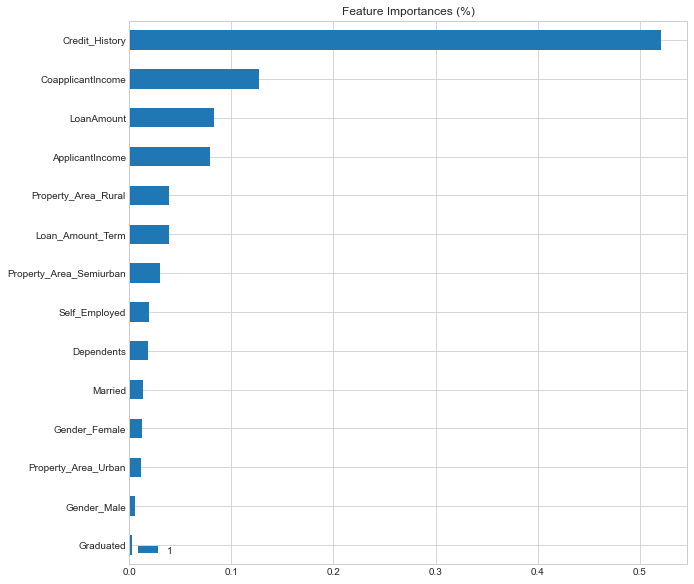

In [ ]:
# Plot Feature Importances to Visualize better
# Note: Visualization is for the best model --> grid.best_params_

pd.DataFrame(dict(zip(x_train.columns, grid.best_estimator_.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)", figsize=(10,10));

In [ ]:
grid.best_estimator_.estimators_

[DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1491434855),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1819583497),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state

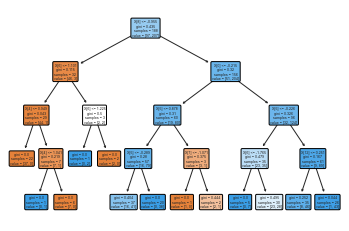

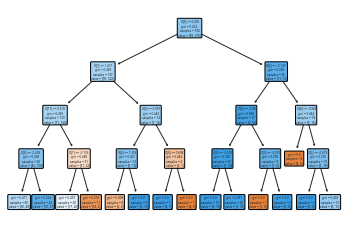

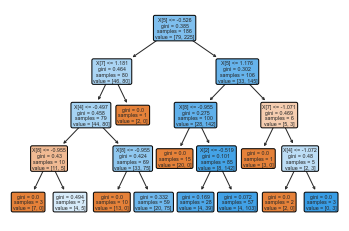

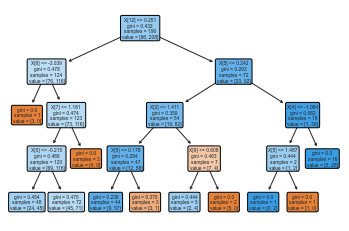

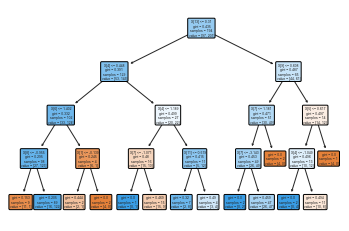

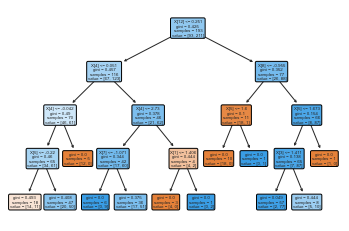

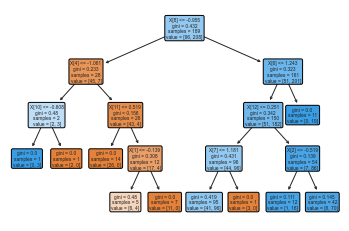

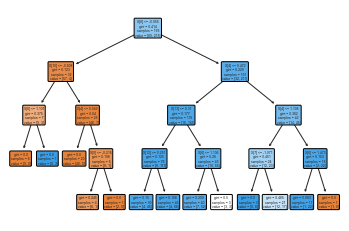

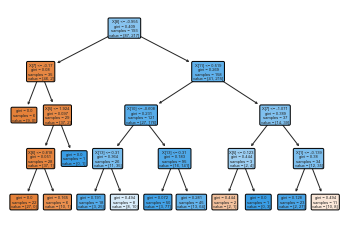

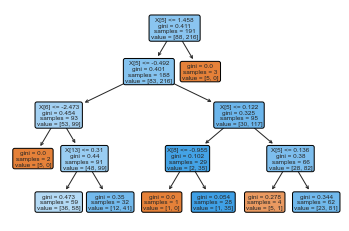

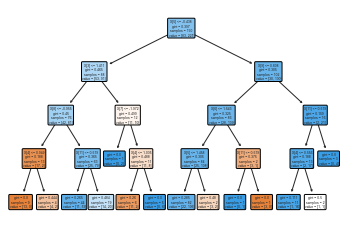

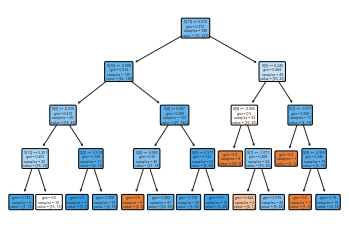

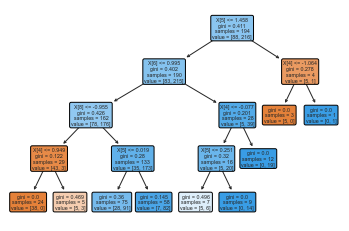

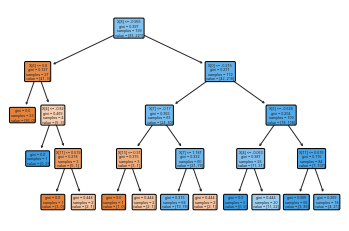

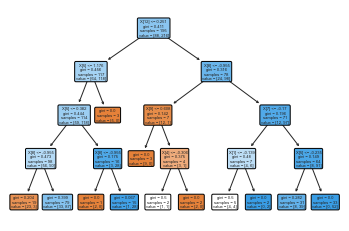

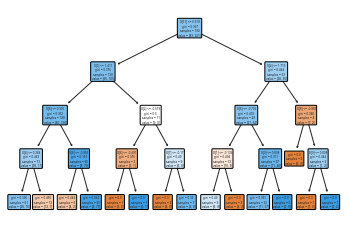

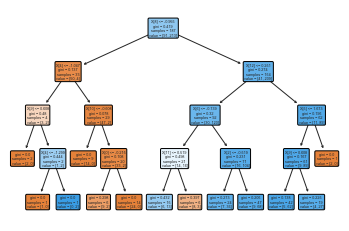

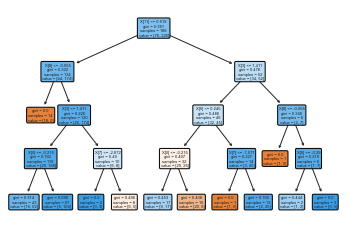

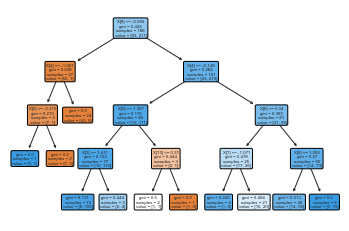

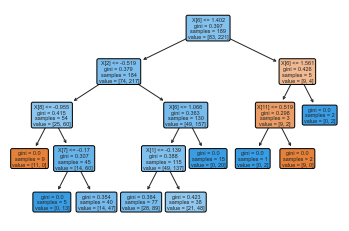

In [ ]:
# Plot the Decision Trees from the Grid Search Random Forest
for x in range(len(grid.best_estimator_.estimators_)):
    tree.plot_tree(
    grid.best_estimator_.estimators_[x], # Access each individual estimator
    filled=True,
    rounded=True,
    )
    plt.show()

## Third Classification Model

### Logistic Regression Model

In [ ]:
pipe = make_pipeline(
    # Step-1 Scale parameters
    StandardScaler(),
    # Step-2 create PCA and set number of components
    PCA(n_components= 12),
    # Step-3 fit the principles to the ML model
    LogisticRegression()
)

pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8181818181818182

In [ ]:
pred = pipe.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.41      0.56        22
           1       0.81      0.98      0.89        55

    accuracy                           0.82        77
   macro avg       0.85      0.70      0.72        77
weighted avg       0.83      0.82      0.79        77



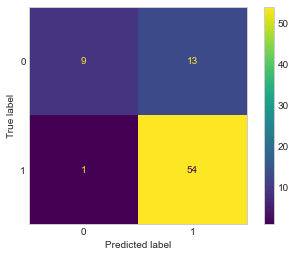

In [ ]:
plot_confusion_matrix(pipe, x_test, y_test)
plt.grid(False);

### Grid Search

In [ ]:
# Remake Pipeline and let grid search tell us the best hyper parameters
pipe2 = make_pipeline(
    StandardScaler(),
    PCA(),
    LogisticRegression()
)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "standardscaler__with_mean": [True, False], #
    "standardscaler__with_std": [True, False],
    "pca__n_components": [5,6,7,8,9,10, 11, 12, 13, 14], # 10 components explains the most variance
    "logisticregression__C": [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
    "logisticregression__max_iter": [ 1000, 2000, 2500]
}

grid = GridSearchCV(
    pipe2, 
    param_grid=param_grid, 
    cv=5, 
    verbose=2,
    n_jobs=-1
)

grid.fit(x_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [1, 0.9, 0.8, 0.7, 0.6, 0.5,
                                                   0.4, 0.3, 0.2, 0.1],
                         'logisticregression__max_iter': [1000, 2000, 2500],
                         'pca__n_components': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                               14],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=2)

In [ ]:
grid_df = pd.DataFrame(grid.cv_results_)

grid_df 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030782,0.004576,0.003798,0.000400,1,1000,5,True,True,"{'logisticregression__C': 1, 'logisticregressi...",0.737705,0.819672,0.737705,0.721311,0.750000,0.753279,0.034426,781
1,0.043976,0.007039,0.003598,0.000490,1,1000,5,True,False,"{'logisticregression__C': 1, 'logisticregressi...",0.721311,0.704918,0.704918,0.704918,0.716667,0.710546,0.007048,841
2,0.014191,0.001719,0.003998,0.000632,1,1000,5,False,True,"{'logisticregression__C': 1, 'logisticregressi...",0.737705,0.819672,0.737705,0.721311,0.750000,0.753279,0.034426,781
3,0.034380,0.004920,0.003798,0.000748,1,1000,5,False,False,"{'logisticregression__C': 1, 'logisticregressi...",0.721311,0.704918,0.704918,0.704918,0.716667,0.710546,0.007048,841
4,0.014592,0.001496,0.003398,0.000490,1,1000,6,True,True,"{'logisticregression__C': 1, 'logisticregressi...",0.737705,0.819672,0.786885,0.803279,0.850000,0.799508,0.037281,691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.057967,0.018878,0.003399,0.000490,0.1,2500,13,False,False,"{'logisticregression__C': 0.1, 'logisticregres...",0.803279,0.803279,0.786885,0.786885,0.783333,0.792732,0.008708,763
1196,0.009795,0.002924,0.002998,0.001265,0.1,2500,14,True,True,"{'logisticregression__C': 0.1, 'logisticregres...",0.852459,0.836066,0.836066,0.852459,0.883333,0.852077,0.017263,1
1197,0.062567,0.015067,0.003398,0.000800,0.1,2500,14,True,False,"{'logisticregression__C': 0.1, 'logisticregres...",0.803279,0.803279,0.786885,0.786885,0.783333,0.792732,0.008708,763
1198,0.012793,0.005597,0.003198,0.000979,0.1,2500,14,False,True,"{'logisticregression__C': 0.1, 'logisticregres...",0.852459,0.836066,0.836066,0.852459,0.883333,0.852077,0.017263,1


In [ ]:
parameters = ['param_logisticregression__max_iter','param_pca__n_components','param_standardscaler__with_mean','param_standardscaler__with_std','mean_test_score','rank_test_score']

grid_df[parameters]

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
0,1000,5,True,True,0.753279,781
1,1000,5,True,False,0.710546,841
2,1000,5,False,True,0.753279,781
3,1000,5,False,False,0.710546,841
4,1000,6,True,True,0.799508,691
...,...,...,...,...,...,...
1195,2500,13,False,False,0.792732,763
1196,2500,14,True,True,0.852077,1
1197,2500,14,True,False,0.792732,763
1198,2500,14,False,True,0.852077,1


In [ ]:
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
957,2500,14,True,False,0.852077,1
1110,1000,12,False,True,0.852077,1
1098,1000,9,False,True,0.852077,1
1148,2000,12,True,True,0.852077,1
1108,1000,12,True,True,0.852077,1
...,...,...,...,...,...,...
495,1000,8,False,False,0.687596,1177
93,2500,8,True,False,0.687596,1177
23,1000,10,False,False,0.684372,1198
63,2000,10,False,False,0.684372,1198


In [ ]:
# Note: we have more than 20 possibilities ranked as 1st 
# These are probably the ones we need to focus on

grid_df['rank_test_score'].value_counts()

37      315
901      66
841      60
463      54
691      48
415      48
1012     42
529      42
361      39
1        36
607      30
1126     24
781      24
649      24
1156     21
1177     21
1108     18
982      18
1087     18
400      15
637      12
817      12
595      12
679      12
745      12
763      12
1054     12
1075     12
517      12
1066      9
352       9
973       6
571       6
775       6
757       6
967       6
583       6
739       6
835       6
811       6
673       6
1006      6
829       6
1000      6
577       6
805       6
589       6
1150      6
979       3
1105      3
1198      3
Name: rank_test_score, dtype: int64

In [ ]:
# Best Parameters
grid.best_params_

{'logisticregression__C': 0.3,
 'logisticregression__max_iter': 1000,
 'pca__n_components': 13,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': False}

In [ ]:
best = grid_df[parameters].sort_values(by = ['rank_test_score']).head(24)

best

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
957,2500,14,True,False,0.852077,1
1110,1000,12,False,True,0.852077,1
1098,1000,9,False,True,0.852077,1
1148,2000,12,True,True,0.852077,1
1108,1000,12,True,True,0.852077,1
1136,2000,9,True,True,0.852077,1
1138,2000,9,False,True,0.852077,1
1140,2000,10,True,True,0.852077,1
1158,2000,14,False,True,0.852077,1
953,2500,13,True,False,0.852077,1


In [ ]:
best.sort_values(by = ['param_pca__n_components'])

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
1098,1000,9,False,True,0.852077,1
1136,2000,9,True,True,0.852077,1
1138,2000,9,False,True,0.852077,1
1096,1000,9,True,True,0.852077,1
1178,2500,9,False,True,0.852077,1
1176,2500,9,True,True,0.852077,1
1182,2500,10,False,True,0.852077,1
1140,2000,10,True,True,0.852077,1
1142,2000,10,False,True,0.852077,1
1100,1000,10,True,True,0.852077,1


In [ ]:
# Best Scoring Model
grid.best_score_

0.8520765027322404

In [ ]:
val_train = round(grid.score(x_train, y_train),2)*100
val_test = round(grid.score(x_test, y_test),2)*100

# Note I will be testing the model on both the train + test data 
# We are testing the model on the "Train Data" to find if we have over fitting 

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 86.0%
Test Set Accuracy: 82.0%


In [ ]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(with_std=False)),
                ('pca', PCA(n_components=13)),
                ('logisticregression',
                 LogisticRegression(C=0.3, max_iter=1000))])

In [ ]:
# Predicting the results based on the best estimator 

pred = grid.best_estimator_.predict(x_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.41      0.56        22
           1       0.81      0.98      0.89        55

    accuracy                           0.82        77
   macro avg       0.85      0.70      0.72        77
weighted avg       0.83      0.82      0.79        77



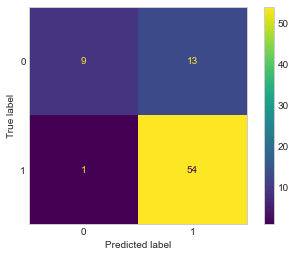

In [ ]:
plot_confusion_matrix(grid, x_test, y_test)

plt.grid(False);

## Fourth Classification Model

### Decision Tree Classfication Model Using Entropy Information Gain

In [ ]:
class_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=3)

In [ ]:
class_tree.fit(X_train_sc, y_train)

preds_class = class_tree.predict(X_test_sc)

In [ ]:
val_train = round(class_tree.score(X_train_sc, y_train),2)*100
val_test = round(class_tree.score(X_test_sc, y_test),2)*100

# Note I will be testing the model on both the train + test data 
# We are testing the model on the "Train Data" to find if we have over fitting 

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 87.0%
Test Set Accuracy: 83.0%


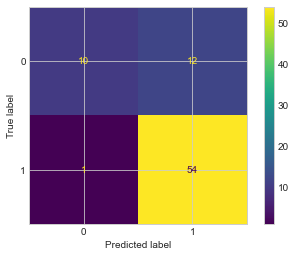

In [ ]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_tree, X_test_sc, y_test);

In [ ]:
# Printing the classification report
print(classification_report(y_test, preds_class))

              precision    recall  f1-score   support

           0       0.91      0.45      0.61        22
           1       0.82      0.98      0.89        55

    accuracy                           0.83        77
   macro avg       0.86      0.72      0.75        77
weighted avg       0.84      0.83      0.81        77



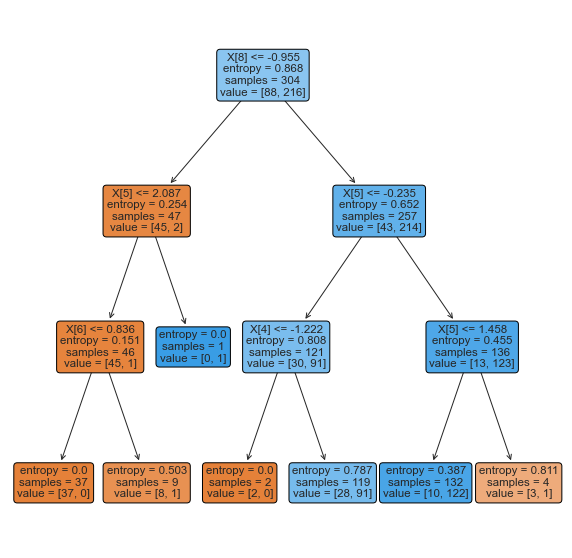

In [ ]:
# Plot the decision tree
plt.figure(figsize=(10,10))

tree.plot_tree(
    class_tree, 
    filled=True,
    rounded=True,
);

# pipelines to the best model

## Regression Analysis Summary

In [ ]:
model_name = ['Random Forest', 'K-Nearest Neighbors', 'Linear Regression ']
model_pred = [preds_forest, knn_pred, lr_preds]

for x in range(len(model_pred)):
    
    reg_cost(model_name[x],y_test, model_pred[x] )

Cost functions for the Random Forest regression is:
Mean Square Error: 10802.65
Mean Absolute Error: 102.72


Cost functions for the K-Nearest Neighbors regression is:
Mean Square Error: 11246.92
Mean Absolute Error: 101.49


Cost functions for the Linear Regression  regression is:
Mean Square Error: 11250.98
Mean Absolute Error: 104.93


